In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
housing = pd.read_csv("housing.csv")

Saving housing.csv to housing (2).csv


In [7]:
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


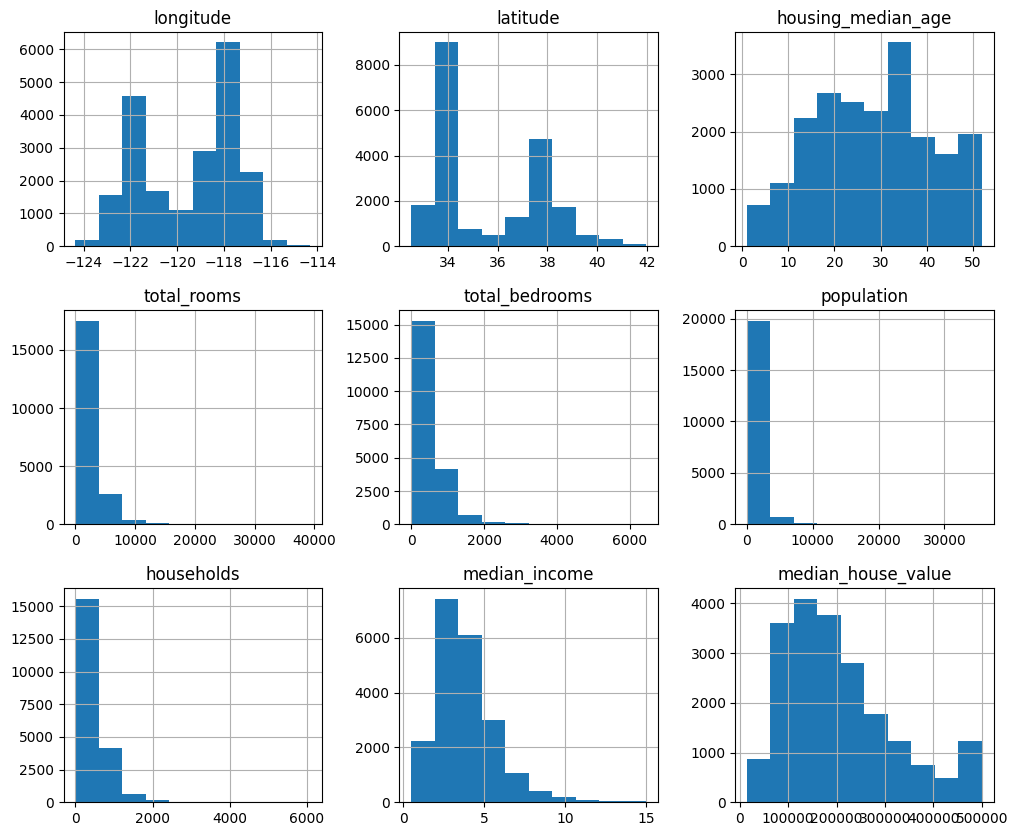

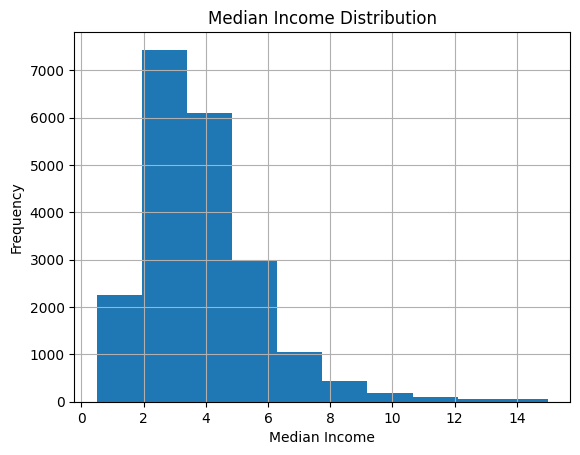

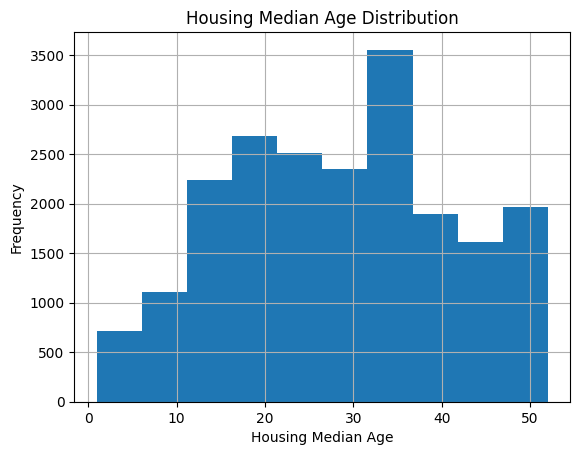

In [10]:
housing.hist(figsize=(12,10))
plt.show()
plt.figure()
housing["median_income"].hist()
plt.title("Median Income Distribution")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

plt.figure()
housing["housing_median_age"].hist()
plt.title("Housing Median Age Distribution")
plt.xlabel("Housing Median Age")
plt.ylabel("Frequency")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print("Random Test Set Size:", len(test_set))
from sklearn.model_selection import StratifiedShuffleSplit

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.,1.5,3.0,4.5,6.,np.inf],
    labels=[1,2,3,4,5]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print("Stratified Test Set Size:", len(strat_test_set))


Random Test Set Size: 4128
Stratified Test Set Size: 4128


<Figure size 640x480 with 0 Axes>

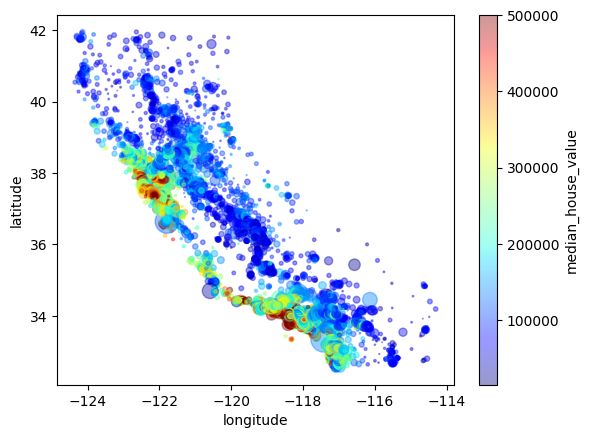

In [13]:
plt.figure()
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"]/100,
    c="median_house_value",
    cmap="jet",
    colorbar=True
)
plt.show()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


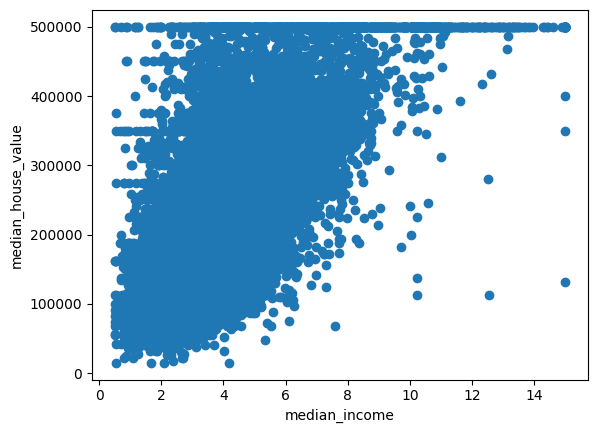

In [15]:
corr_matrix = housing.corr(numeric_only=True)

corr_with_price = corr_matrix["median_house_value"].sort_values(ascending=False)

print(corr_with_price)
top_feature = corr_with_price.index[1]

plt.figure()
plt.scatter(housing[top_feature], housing["median_house_value"])
plt.xlabel(top_feature)
plt.ylabel("median_house_value")
plt.show()

In [16]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

new_corr = housing.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

print(new_corr)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


In [17]:
print("Missing Values Before:\n", housing.isnull().sum())

# Fill missing total_bedrooms with median
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(
    housing["total_bedrooms"].median()
)

print("Missing Values After:\n", housing.isnull().sum())

Missing Values Before:
 longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64
Missing Values After:
 longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64


In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat = housing[["ocean_proximity"]]

housing_cat_1hot = encoder.fit_transform(housing_cat)

print("Categories:", encoder.categories_)
print("Encoded Shape:", housing_cat_1hot.shape)

Categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
Encoded Shape: (20640, 5)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_num = housing.drop("ocean_proximity", axis=1)

housing_scaled = scaler.fit_transform(housing_num)

print("Scaled Data Shape:", housing_scaled.shape)

Scaled Data Shape: (20640, 13)


In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]
        bedrooms_per_room = X[:, 4] / X[:, 3]

        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

housing = pd.read_csv("housing.csv")

housing_num = housing.drop("ocean_proximity", axis=1)
housing_cat = housing[["ocean_proximity"]]

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

print("Final Prepared Data Shape:", housing_prepared.shape)


Final Prepared Data Shape: (20640, 17)
